<a href="https://colab.research.google.com/github/seismosmsr/machine_learning/blob/main/gedi_analysis_8_23_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the

In [2]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)

Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [ ]:
# while(TRUE){}

In [ ]:
# drive_deauth()
# drive_auth(use_oob = TRUE, cache = FALSE)

In [ ]:
# GEDI data
# https://drive.google.com/file/d/14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4/view?usp=drive_link

# Landtrendr data
# https://drive.google.com/file/d/1FrN1tUojGV80f3kDtmezsFsvLabIoGiW/view?usp=drive_link

# HUC 8
# https://drive.google.com/file/d/1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z/view?usp=drive_link

# HUC 10
# https://drive.google.com/file/d/1m86VWKw3nys-oY931eq9dC6xv0cEfs4a/view?usp=drive_link

# HUC 12
# https://drive.google.com/file/d/18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL/view?usp=drive_link

# GEDI vectorized by YOD, Queen's rule.
# https://drive.google.com/file/d/1miOMqCh081yceVUfVVOL5JtxpKUgBO-2/view?usp=drive_link

In [3]:
drive_download(file = as_id('1FrN1tUojGV80f3kDtmezsFsvLabIoGiW'), path =  '/content/HJA_LandTrendr_84_23.tif', overwrite = TRUE)

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=bfff81dae5889d51ddbf04c9bfbadb91&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWRldTVCVUpxdXFfdjZVMDRtbFltSi14WXluSWJsYnQtR29jSUREbm55SklJMlJLYmpRQUJ5NjRNZ1hEb0xMeXAzdmJKZyIsInN0YXRlIjoiYmZmZjgxZGFlNTg4OWQ1MWRkYmYwNGM5YmZiYWRiOTEifQ==


File downloaded:

• HJA_LandTrendr_84_23_2.tif <id: 1FrN1tUojGV80f3kDtmezsFsvLabIoGiW>

Saved locally as:

• /content/HJA_LandTrendr_84_23.tif



In [4]:
drive_download(file = as_id('14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4'), path =  '/content/HJA_gedi.gpkg', overwrite = TRUE)

File downloaded:

• HJA_GEDI_4.gpkg <id: 14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4>

Saved locally as:

• /content/HJA_gedi.gpkg



In [5]:
drive_download(file = as_id('1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z'), path =  '/content/huc_8.gpkg', overwrite = TRUE)
drive_download(file = as_id('1m86VWKw3nys-oY931eq9dC6xv0cEfs4a'), path =  '/content/huc_10.gpkg', overwrite = TRUE)
drive_download(file = as_id('18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL'), path =  '/content/huc_12.gpkg', overwrite = TRUE)

File downloaded:

• WBDHU8.gpkg <id: 1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z>

Saved locally as:

• /content/huc_8.gpkg

File downloaded:

• WBDHU10.gpkg <id: 1m86VWKw3nys-oY931eq9dC6xv0cEfs4a>

Saved locally as:

• /content/huc_10.gpkg

File downloaded:

• WBDHU12.gpkg <id: 18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL>

Saved locally as:

• /content/huc_12.gpkg



In [8]:
# https://drive.google.com/file/d/1miOMqCh081yceVUfVVOL5JtxpKUgBO-2/view?usp=drive_link
drive_download(file = as_id('1miOMqCh081yceVUfVVOL5JtxpKUgBO-2'), path =  '/content/gedi_vector.gpkg', overwrite = TRUE)

File downloaded:

• yod_vector.gpkg <id: 1miOMqCh081yceVUfVVOL5JtxpKUgBO-2>

Saved locally as:

• /content/gedi_vector.gpkg



In [15]:
landtrendr_tif <- stack('/content/HJA_LandTrendr_84_23.tif')

In [9]:
gedi_vec_gpkg <- st_read('/content/gedi_vector.gpkg') %>% st_transform(st_crs('EPSG:4326'))

Multiple layers are present in data source /content/gedi_vector.gpkg, reading layer `vectorized'.
Use `st_layers' to list all layer names and their type in a data source.
Set the `layer' argument in `st_read' to read a particular layer.


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
“automatically selected the first layer in a data source containing more than one.”


Reading layer `vectorized' from data source `/content/gedi_vector.gpkg' using driver `GPKG'
Simple feature collection with 478987 features and 4 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85836 xmax: -121.7595 ymax: 44.90912
Geodetic CRS:  WGS 84


In [10]:
huc_8_gpgk <- st_read('/content/huc_8.gpkg') %>% st_transform(st_crs('EPSG:4326'))
huc_10_gpgk <- st_read('/content/huc_10.gpkg')  %>% st_transform(st_crs('EPSG:4326'))
huc_12_gpgk <- st_read('/content/huc_12.gpkg')  %>% st_transform(st_crs('EPSG:4326'))

Reading layer `wbdhu8_central_oregon__wdb_oregon_state_gdb__wbdhu8' from data source `/content/huc_8.gpkg' using driver `GPKG'
Simple feature collection with 4 features and 15 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85856 xmax: -121.7597 ymax: 44.90894
Geodetic CRS:  NAD83
Reading layer `wdb_oregon_state_gdb__wbdhu10' from data source 
  `/content/huc_10.gpkg' using driver `GPKG'
Simple feature collection with 27 features and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85856 xmax: -121.7597 ymax: 44.90894
Geodetic CRS:  NAD83
Reading layer `wdb_oregon_state_gdb__wbdhu12' from data source 
  `/content/huc_12.gpkg' using driver `GPKG'
Simple feature collection with 161 features and 20 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85856 xmax: -121.7597 ymax: 44.90894
Geodetic CRS:  NAD83


In [ ]:
# [# Install and load required packages
# # install.packages(c("sf", "DBI"))
# library(sf)
# library(DBI)

# # Read a spatial dataset (e.g., a shapefile) into R
# # dataset <- st_read("path_to_your_dataset.shp")

# # Connect to the PostgreSQL database
# conn <- RPostgreSQL::dbConnect("PostgreSQL",
#                  dbname = "jifesypi",
#                  host = "mild-williams-pear.db.elephantsql.com",
#                 #  port = "your_port",
#                  user = "jifesypi",
#                  password = "Qxds23zjkpIIU343-GGHNlxqFdD3Pdlr")

# # # Ensure the connection is PostGIS-enabled
# # if (!st_is_postgis(con)) {
# #   stop("The database is not PostGIS enabled!")
# # }

# # Upload the dataset to PostgreSQL
# # 'name' parameter determines the name of the table in the database
# st_write(gedi_sf, conn, layer = "hja_gedi", delete_layer = TRUE)

# # Close the database connection
# dbDisconnect(conn)


In [479]:
query_wkt <- st_as_text(huc_12_gpgk[1,]$geom, crs = 4326, EWKT = TRUE)

query_sql <- paste0("SELECT * FROM hja_gedi WHERE ST_Intersects(geom,'",query_wkt,"')")
print(query_sql)
# Connect to the PostgreSQL database
conn <- RPostgreSQL::dbConnect("PostgreSQL",
                 dbname = "jifesypi",
                 host = "mild-williams-pear.db.elephantsql.com",
                #  port = "your_port",
                 user = "jifesypi",
                 password = "Qxds23zjkpIIU343-GGHNlxqFdD3Pdlr")

gedi_sf <- st_read(conn,query=query_sql)

dbDisconnect(conn)

[1] "SELECT * FROM hja_gedi WHERE ST_Intersects(geom,'SRID=4326;MULTIPOLYGON (((-121.8047 44.72916, -121.8043 44.72919, -121.804 44.72918, -121.8039 44.72916, -121.8029 44.72903, -121.8022 44.72877, -121.8014 44.72853, -121.8005 44.72818, -121.7989 44.72777, -121.798 44.72749, -121.7973 44.72725, -121.7968 44.72709, -121.7962 44.72681, -121.7957 44.72649, -121.7951 44.72621, -121.7944 44.72589, -121.7946 44.72561, -121.7948 44.72548, -121.7952 44.72511, -121.7954 44.72487, -121.7958 44.72449, -121.796 44.724, -121.796 44.72396, -121.796 44.72377, -121.796 44.72302, -121.796 44.72276, -121.7961 44.72252, -121.7961 44.72228, -121.7959 44.72189, -121.7959 44.72186, -121.7958 44.72167, -121.7955 44.72117, -121.7955 44.72098, -121.7954 44.72089, -121.7953 44.72052, -121.7953 44.72019, -121.7954 44.71985, -121.7957 44.71916, -121.7959 44.71896, -121.7962 44.71825, -121.7962 44.71805, -121.7961 44.7178, -121.7961 44.7175, -121.796 44.71739, -121.796 44.71734, -121.796 44.71732, -121.796 44.71

[1] TRUE

In [480]:
gedi_dt <- gedi_sf %>% data.table
gedi_dt %>% nrow
gedi_dt[l4_quality_flag ==1,] %>% nrow

[1] 19243

[1] 5368

In [481]:
# landtrendr_tif[landtrendr_tif < 0] <- NA

In [482]:
gedi_dt[,geom_buffer := geom %>% st_transform('EPSG:6822') %>% st_buffer(25)]

In [483]:
landtrendr_rast <- terra::rast(landtrendr_tif)

extract_dt <-

gedi_dt[,geom_buffer] %>% st_as_sf %>%
exact_extract(landtrendr_rast,.,force_df=T,c('min','max','mean','median'))

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


In [484]:
summary_dt <- data.table(gedi_dt,extract_dt[,names(extract_dt) %>% strsplit('[.]') %>% lapply(function(x){x[[1]]}) %>% unlist %>% order])

In [485]:
summary_dt$agbd[summary_dt$agbd<0] <- NA

In [486]:
delta_time_to_timestamp <- function(delta_time) {
  # Define the reference date
  reference_date <- as.POSIXct("2018-01-01 00:00:00", tz = "UTC")

  # Add the delta_time (in seconds) to the reference date
  timestamp <- reference_date + delta_time

  return(timestamp)
}

In [487]:
summary_dt$year <- delta_time_to_timestamp(summary_dt$delta_time) %>% format("%Y")

In [488]:
# Editorial change for review
summary_dt[,group:=as.integer(cut((median.preval-median.mag)/median.preval, breaks = quantile((median.preval[!is.na(agbd) & median.preval > 0]-median.mag[!is.na(agbd) & median.preval > 0])/median.preval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 1/3)), labels = FALSE, include.lowest = TRUE)) ]

# summary_dt[,group:=as.integer(cut((median.preval-median.mag), breaks = quantile((median.preval[!is.na(agbd) & median.preval > 0]-median.mag[!is.na(agbd) & median.preval > 0]), probs = seq(0, 1, by = 0.25)), labels = FALSE, include.lowest = TRUE)) ]

In [489]:
names(summary_dt)

[1] "agbd"               "lat_lowestmode"     "lon_lowestmode"    
 [4] "agbd_pi_lower"      "agbd_pi_upper"      "agbd_se"           
 [7] "agbd_t"             "agbd_t_se"          "algorithm_run_flag"
[10] "channel"            "degrade_flag"       "delta_time"        
[13] "elev_lowestmode"    "l2_quality_flag"    "l4_quality_flag"   
[16] "geom"               "geom_buffer"        "max.yod"           
[19] "max.mag"            "max.dur"            "max.preval"        
[22] "max.rate"           "max.dsnr"           "mean.yod"          
[25] "mean.mag"           "mean.dur"           "mean.preval"       
[28] "mean.rate"          "mean.dsnr"          "median.yod"        
[31] "median.mag"         "median.dur"         "median.preval"     
[34] "median.rate"        "median.dsnr"        "min.yod"           
[37] "min.mag"            "min.dur"            "min.preval"        
[40] "min.rate"           "min.dsnr"           "year"              
[43] "group"

In [490]:
agbd_preval_lm <- summary_dt[min.yod>0 & min.yod > year &agbd>0 &min.yod>2018 ,][,agbd_group:= round(min.preval,-1)][,list(min.preval = mean(min.preval),agbd= mean(agbd)),by=c('agbd_group')] %>%
  lm(agbd~min.preval,.)

In [492]:
summary_dt %>% names


[1] "agbd"               "lat_lowestmode"     "lon_lowestmode"    
 [4] "agbd_pi_lower"      "agbd_pi_upper"      "agbd_se"           
 [7] "agbd_t"             "agbd_t_se"          "algorithm_run_flag"
[10] "channel"            "degrade_flag"       "delta_time"        
[13] "elev_lowestmode"    "l2_quality_flag"    "l4_quality_flag"   
[16] "geom"               "geom_buffer"        "max.yod"           
[19] "max.mag"            "max.dur"            "max.preval"        
[22] "max.rate"           "max.dsnr"           "mean.yod"          
[25] "mean.mag"           "mean.dur"           "mean.preval"       
[28] "mean.rate"          "mean.dsnr"          "median.yod"        
[31] "median.mag"         "median.dur"         "median.preval"     
[34] "median.rate"        "median.dsnr"        "min.yod"           
[37] "min.mag"            "min.dur"            "min.preval"        
[40] "min.rate"           "min.dsnr"           "year"              
[43] "group"

In [493]:
# summary_dt[l4_quality_flag ==1][ max.yod == (year %>% as.numeric+1) & min.yod == (year %>% as.numeric+1) ,]

agbd,lat_lowestmode,lon_lowestmode,agbd_pi_lower,agbd_pi_upper,agbd_se,agbd_t,agbd_t_se,algorithm_run_flag,channel,⋯,median.rate,median.dsnr,min.yod,min.mag,min.dur,min.preval,min.rate,min.dsnr,year,group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
50.18874,44.75811,-121.9325,2.562479019,157.9553,11.10390,7.040417,3.311562,1,0,⋯,614.2123,20.386893,2021,553,1,835,553,14,2022,1
132.42645,44.76434,-121.9179,36.297733307,288.6798,11.10099,11.436224,3.311130,1,0,⋯,419.5394,7.046341,2021,362,1,861,120,4,2022,2
73.17270,44.76489,-121.9166,9.432639122,197.0359,11.10073,8.500996,3.311090,1,0,⋯,501.6898,8.930117,2021,416,1,683,138,5,2022,1
112.14738,44.76516,-121.9160,26.086992264,258.3217,11.09902,10.524218,3.310836,1,0,⋯,493.7058,11.515144,2021,283,1,623,283,6,2022,2
31.12476,44.71696,-121.8604,0.008981792,122.3931,11.10616,5.544320,3.311899,1,0,⋯,586.3070,13.433703,2018,450,1,652,450,12,2019,1
222.21620,44.72304,-121.8461,88.798156738,415.7749,11.10396,14.814368,3.311571,1,0,⋯,306.9145,10.098080,2018,223,1,807,223,7,2019,3


`geom_smooth()` using formula = 'y ~ x'


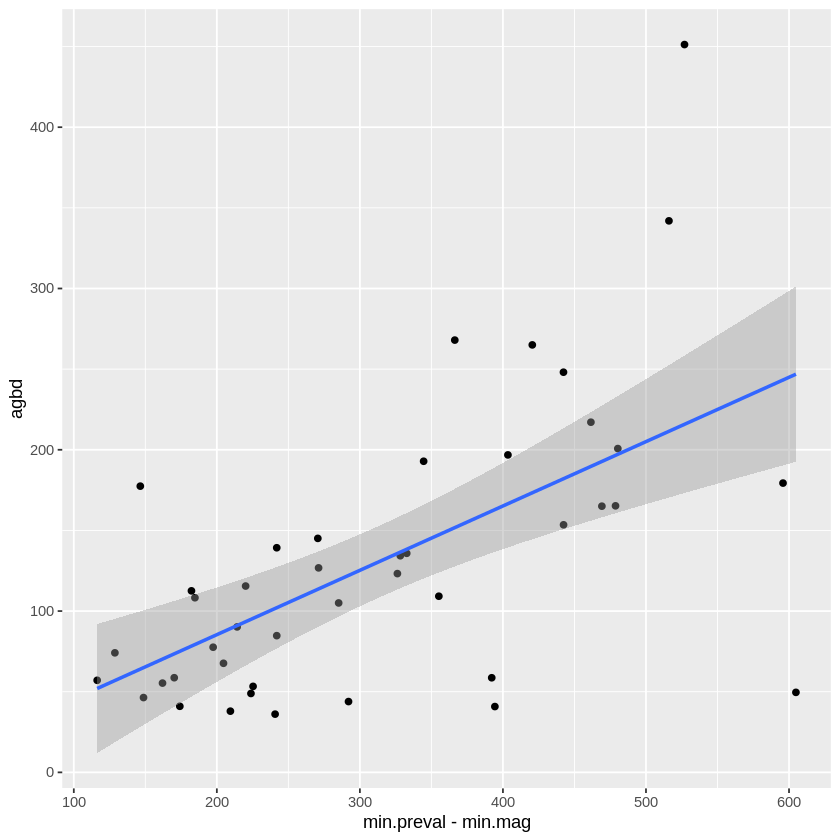

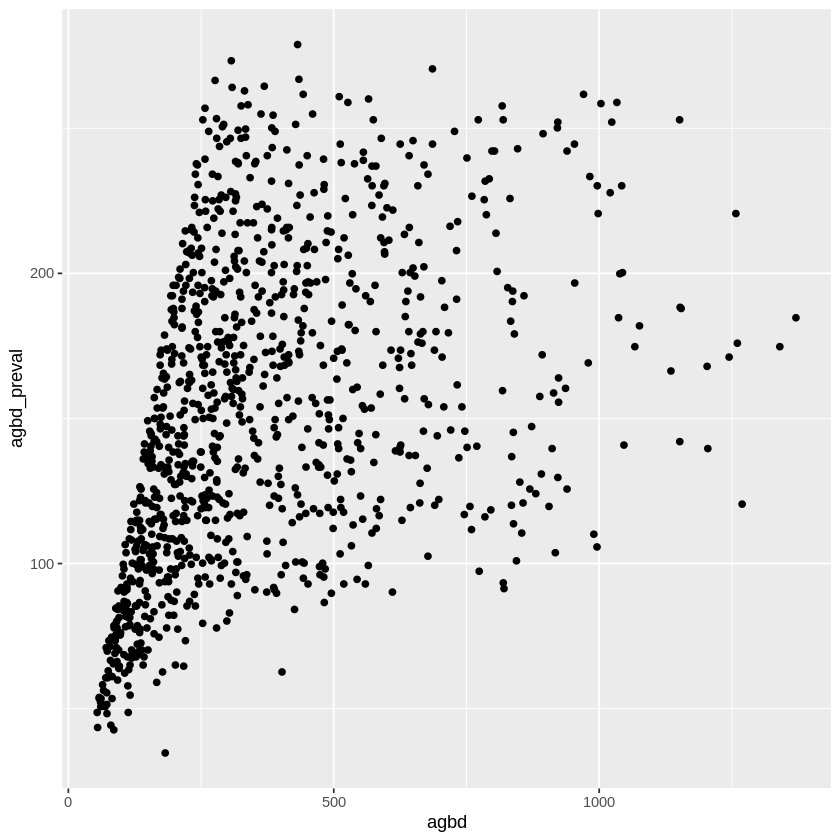

In [494]:
year_off <- 1
summary_dt[l4_quality_flag ==1 & min.yod>1984 & round(min.yod) == (year %>% as.numeric-year_off)& round(max.yod) == (year %>% as.numeric-year_off),] %>% head
# summary_dt[l4_quality_flag ==1 & min.yod>1984 & round(min.yod) == (year %>% as.numeric-year_off)& round(max.yod) == (year %>% as.numeric-year_off),] %>%
#   lm()
summary_dt[agbd_pi_lower>0&l4_quality_flag ==1 & min.yod>1984 & round(min.yod) == (year %>% as.numeric-year_off)& round(max.yod) == (year %>% as.numeric-year_off),][,agbd_group:= round(min.preval,-1)][,agbd_group:= round(min.preval,-2)][,mag_group:= round(min.mag,-2)][,yod_group:= round(2023 - min.yod)][,list(min.preval = mean(mean.preval),min.mag= mean(mean.mag),agbd= mean(agbd)),by=c('agbd_group','mag_group','yod_group')] %>%
  ggplot(aes(y=agbd,x=min.preval- min.mag))+
    geom_point() +
    geom_smooth(method ='lm')

# summary_dt[agbd_pi_lower>0&l4_quality_flag ==1 & min.yod>1984 & round(min.yod) == (year %>% as.numeric+year_off)& round(max.yod) == (year %>% as.numeric+year_off),][,agbd_group:= round(min.preval,-1)][,agbd_group:= round(min.preval,-2)][,mag_group:= round(min.mag,-2)][,yod_group:= round(2023 - min.yod)][,list(min.preval = mean(mean.preval),min.mag= mean(mean.mag),agbd= mean(agbd)),by=c('agbd_group','mag_group','yod_group')] %>%
# ggplot(aes(y=agbd,x=min.preval))+
#   geom_point() +
#   geom_smooth(method ='lm')

agbd_preval_lm <-
summary_dt[agbd_pi_lower>0&l4_quality_flag ==1 & min.yod>1984 & round(min.yod) == (year %>% as.numeric-year_off)& round(max.yod) == (year %>% as.numeric-year_off),][,agbd_group:= round(min.preval,-1)][,agbd_group:= round(min.preval,-2)][,mag_group:= round(min.mag,-2)][,yod_group:= round(2023 - min.yod)][,list(min.preval = mean(mean.preval),min.mag= mean(mean.mag),agbd= mean(agbd)),by=c('agbd_group','mag_group','yod_group')][,min.endval:=(min.preval-min.mag)] %>%
  lm(agbd~min.endval,.)

summary_dt$agbd_preval <- predict(agbd_preval_lm,summary_dt[,min.endval:=(min.preval-min.mag)])

summary_dt[agbd>agbd_preval&l4_quality_flag ==1 & min.yod>1984 ,] %>%
  ggplot(aes(x=agbd,y=agbd_preval))+
    geom_point()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 9866 rows containing non-finite values (`stat_bin()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


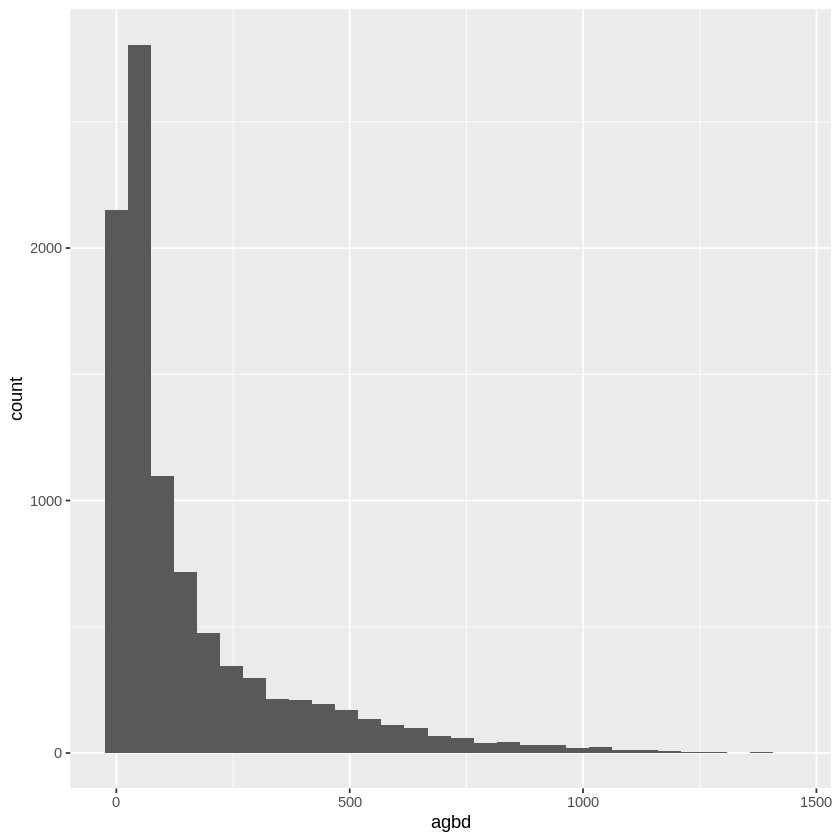

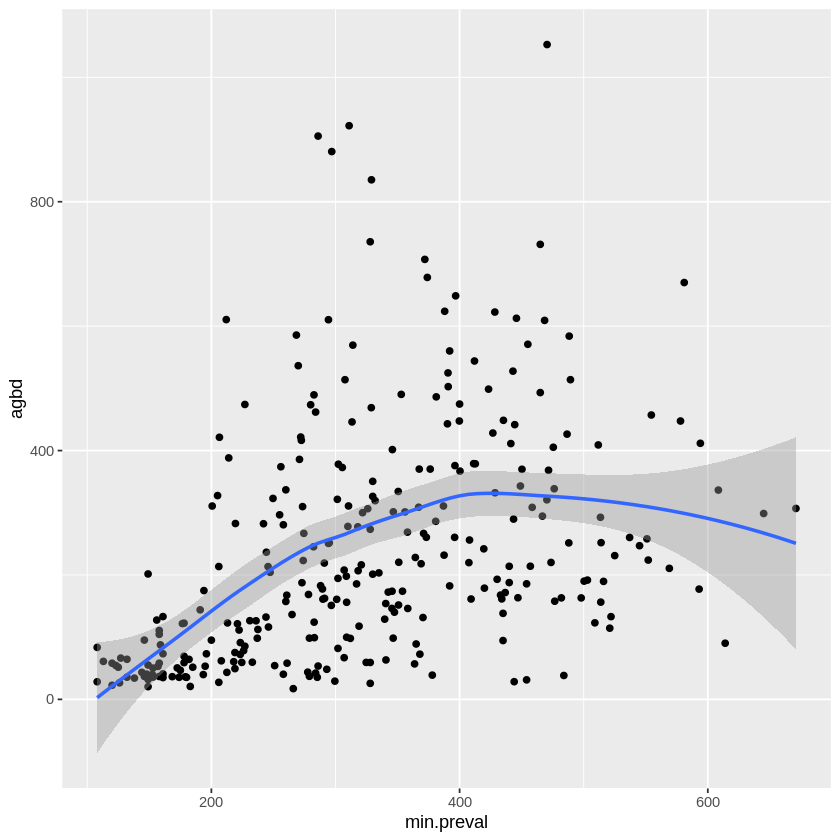

In [495]:
summary_dt[,post_dist_agbd_group := mean(agbd[max.yod == (year %>% as.numeric+1) & min.yod == (year %>% as.numeric+1) ],na.rm=T),by = 'group']

agbd_preval_lm <- summary_dt[min.yod>1984 &l4_quality_flag ==1][max.yod == (year %>% as.numeric+1) & min.yod == (year %>% as.numeric+1) ,][,agbd_group:= round(min.preval,-1)][,list(min.preval = mean(min.preval),agbd= mean(agbd)),by=c('agbd_group')] %>%
  lm(agbd~min.preval,.)

summary_dt$agbd_preval <- predict(agbd_preval_lm,summary_dt)
# agbd_preval_lm %>% summary

 summary_dt %>%
   ggplot(aes(x =agbd))+
    geom_histogram()

summary_dt[l4_quality_flag ==1& min.yod == (year %>% as.numeric+2)][,agbd_group:= round(min.preval)][,list(min.preval = mean(min.preval-min.mag),agbd= mean(agbd)),by=c('agbd_group')]%>%
   ggplot(aes(y=agbd,x=min.preval)) +
   geom_point(aes()) +
   geom_smooth(aes())

  # summary_dt[min.yod>2020 &l4_quality_flag ==1] %>%
  #  ggplot(aes(y=agbd,x=agbd_preval)) +
  #  geom_bin2d()

In [496]:
summary_dt %>% head

agbd,lat_lowestmode,lon_lowestmode,agbd_pi_lower,agbd_pi_upper,agbd_se,agbd_t,agbd_t_se,algorithm_run_flag,channel,⋯,min.mag,min.dur,min.preval,min.rate,min.dsnr,year,group,min.endval,agbd_preval,post_dist_agbd_group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>
NA,44.72319,-121.8967,-9999,-9999,-9999,-9999,-9999,0,0,⋯,457,1,734,457,12,2021,1,277,172.34545,87.57397
NA,44.72292,-121.8961,-9999,-9999,-9999,-9999,-9999,0,0,⋯,529,1,779,529,13,2021,1,250,184.41617,87.57397
NA,44.72266,-121.8955,-9999,-9999,-9999,-9999,-9999,0,0,⋯,532,1,809,532,14,2021,1,277,192.46332,87.57397
NA,44.72240,-121.8949,-9999,-9999,-9999,-9999,-9999,0,0,⋯,502,1,781,502,11,2021,1,279,184.95265,87.57397
NA,44.72213,-121.8943,-9999,-9999,-9999,-9999,-9999,0,0,⋯,511,1,761,511,12,2021,1,250,179.58788,87.57397
NA,44.71818,-121.8850,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,0,0,0,0,2021,2,0,-24.54139,177.62567


[1] 1.303507

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 1.9624”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 3.0464”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 45.998”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“span too small.   fewer data values than degrees of freedom.”
Warning message in predLoess(object$y, ob

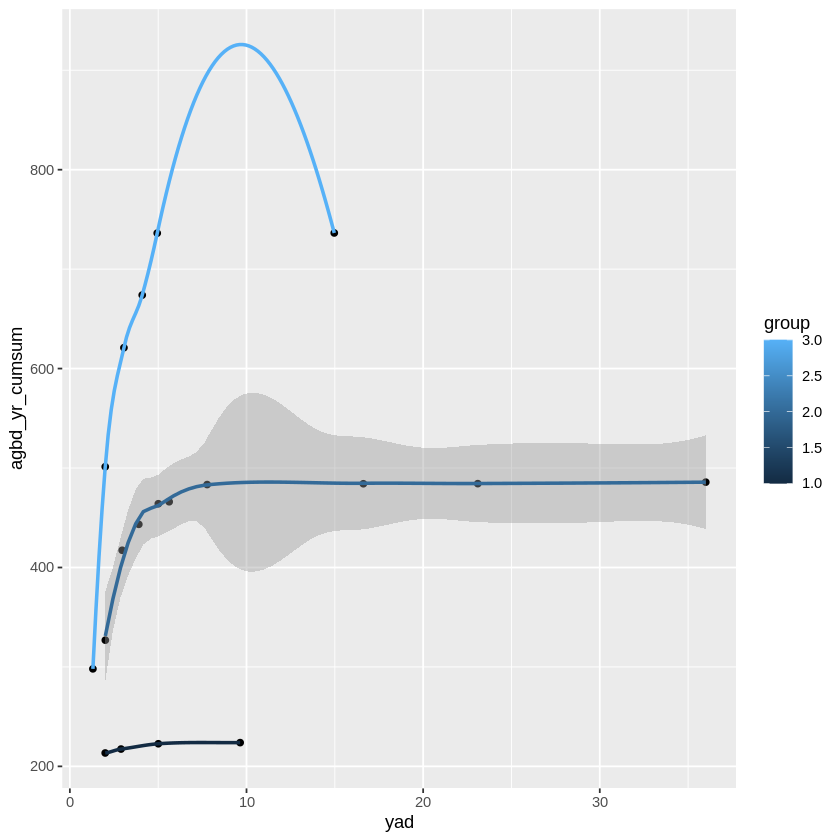

In [504]:
plot_dt <- summary_dt[min.yod>1984 &l4_quality_flag ==1,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd,na.rm=T),agbd_preval = mean(agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,yod_round)][][,agbd_yr:=agbd*(agbd/agbd_preval/yad)]

plot_dt[order(yad),agbd_yr_cumsum := cumsum(agbd_yr)+mean(agbd_preval),by = group]
plot_dt$yad %>% min
plot_dt %>%
ggplot(aes(x=yad,y=agbd_yr_cumsum,group=group))+
geom_point()+
geom_smooth(aes(color=group))

In [499]:
gedi_vec_gpkg$area <- st_area(gedi_vec_gpkg)

summary_dt$gedi_clust <- st_intersects(summary_dt$geom,gedi_vec_gpkg) %>% lapply(function(x){x[1]}) %>% unlist
summary_dt$gedi_clust_area <- gedi_vec_gpkg$area[summary_dt$gedi_clust]

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 7 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Computation failed in `stat_smooth()`
Caused by error in `smooth.construct.cr.smooth.spec()`:
! x has insufficient unique values to support 10 knots: reduce k.”


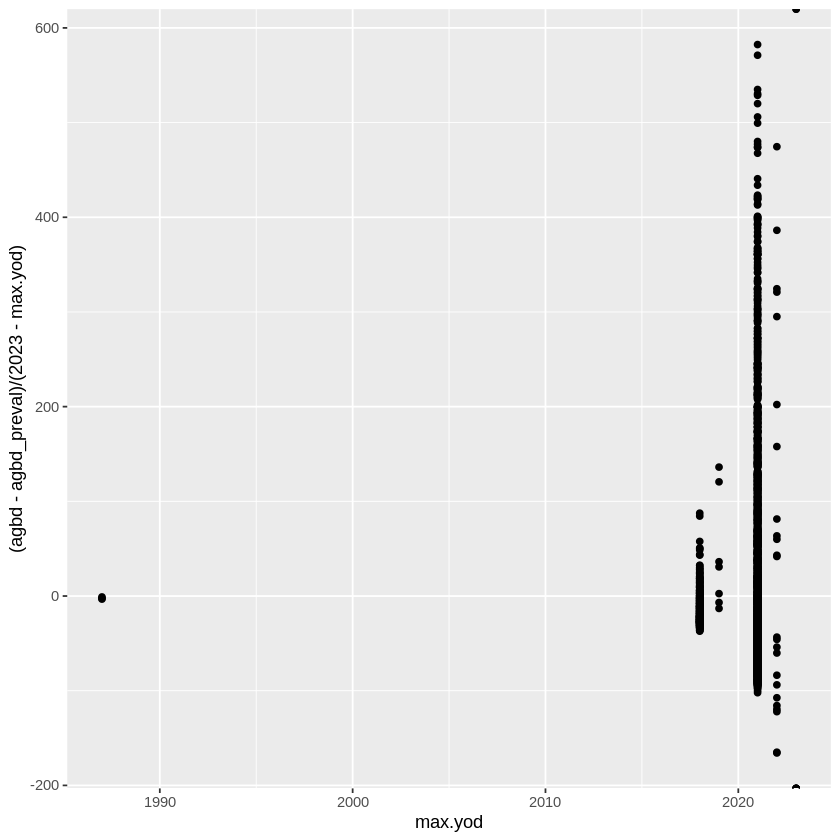

In [500]:
summary_dt[min.yod > 1984 & agbd>0 &l4_quality_flag ==1,] %>%
  ggplot(aes(y=(agbd - agbd_preval)/(2023-max.yod),x=max.yod,group=group))+
  geom_point() +
  # geom_line(aes(color=group))+
  geom_smooth(aes(color=group))

In [501]:
huc_8_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_8_gpgk)

huc_10_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_10_gpgk)

huc_12_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_12_gpgk)

In [502]:
huc_8_summary_dt <- data.table(summary_dt, (huc_8_gpgk %>% data.table)[,c('TNMID','HUC8','Name')][huc_8_int %>% unlist,])
huc_10_summary_dt <- data.table(summary_dt, (huc_10_gpgk %>% data.table)[,c('TNMID','HUC10','Name')][huc_10_int %>% unlist,])
huc_12_summary_dt <- data.table(summary_dt, (huc_12_gpgk %>% data.table)[,c('TNMID','HUC12','Name')][huc_12_int %>% unlist,])

In [503]:
targ_dt <- huc_10_summary_dt[Name == 'Thomas Creek' & group ==1]

loess_dt <- huc_10_summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,Name,yod_round)][yad>3]

huc_10_summary_dt[,yad := 2023-mean.yod]
targ_dt$agbd_pred <-
predict(loess_dt[Name == 'Thomas Creek' & group == 1] %>%
  loess(agbd~yad,.), targ_dt)

ERROR: ignored

In [ ]:
targ_dt[yad>3,] %>%
  ggplot(aes(x=agbd_pred-agbd))+
  geom_histogram(bins=100)

In [ ]:
targ_dt[yad>3,] %>% st_as_sf() %>% st_write('/content/example.gpkg')

In [ ]:
huc_10_dist_table <- huc_10_summary_dt$Name %>% table
huc_10_summary_dt <- huc_10_summary_dt[Name %in% c(huc_10_dist_table[huc_10_dist_table>100] %>% names),]

huc_10_summary_dt[,group:=as.integer(cut((median.preval-median.mag)/median.preval, breaks = quantile((median.preval[!is.na(agbd) & median.preval > 0]-median.mag[!is.na(agbd) & median.preval > 0])/median.preval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 0.25)), labels = FALSE, include.lowest = TRUE)) ,by = 'Name']



fit <- loess(y ~ x)
predictions <- predict(fit, newdata = data.frame(x = x))

huc_10_summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,Name,yod_round)][yad>3] %>%
ggplot(aes(x=yad,y=(floor(agbd))/ceiling(yad),group=group))+
geom_point()+
geom_smooth(aes(color=group)) +
facet_wrap(Name~.)


In [ ]:
huc_12_dist_table <- huc_12_summary_dt$Name %>% table
huc_12_summary_dt <- huc_12_summary_dt[Name %in% c(huc_12_dist_table[huc_12_dist_table>100] %>% names),]

huc_12_summary_dt[,group:=as.integer(cut((median.preval-median.mag)/median.preval, breaks = quantile((median.preval[!is.na(agbd) & median.preval > 0]-median.mag[!is.na(agbd) & median.preval > 0])/median.preval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 0.25)), labels = FALSE, include.lowest = TRUE)) ,by = 'Name']





huc_12_summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,Name,yod_round)][yad>3] %>%
ggplot(aes(x=yad,y=(floor(agbd))/ceiling(yad),group=group))+
geom_point()+
geom_smooth(aes(color=group)) +
facet_wrap(Name~.)